# <center>K-Means Clustering</center> 

In [1]:
#Import libraries
from pylab import *
import cv2
from random import *
set_printoptions(threshold=sys.maxsize)

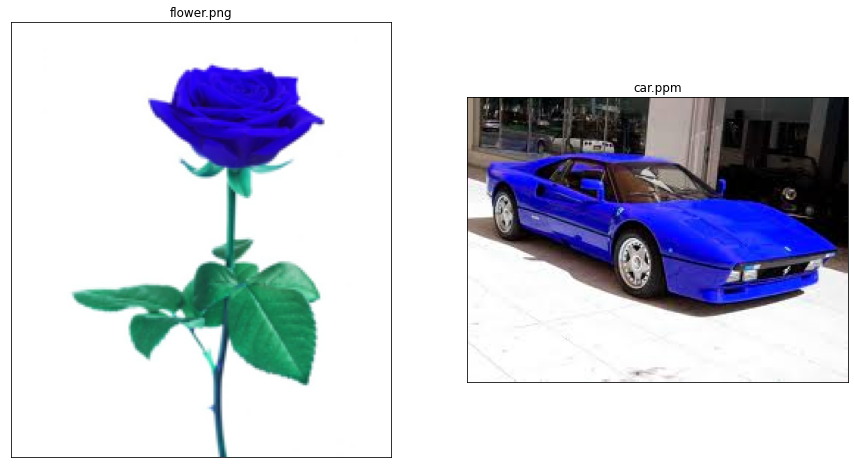

In [2]:
#Load image
K = 3               #No of clusters
N = 30              #No of random intializations
src1 = cv2.imread('flower.png')
src2 = cv2.imread('car.ppm')

# View images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(src1,'gray')
ax1.set_title('flower.png')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(src2,'gray')
ax2.set_title('car.ppm')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()


# K-Means 
Implement the k-means algorithm as discussed in class. The different parameters are described.
- $\textit{img}$ : input data. Can be an image or an array of the shape $(n_{points}, n_{features})$
- $\textit{C}$ : initial value of the centroids for the k-means algorithm. If this parameter is not provided, random initializations are chosen and the algorithm is run multiple times. The best clusters formed according to the metric described in the assignment PDF is kept.
- $\textit{K}$ : number of centroids
- $\textit{Iter}$ : when initial value for centroids is not provided, run k-means clustering for $\textit{n_inits}$ number of times and save the best clusters

In [3]:
#Perform K-means clustering with initial cluster means 
#Parameters
c1 = array([0,255,0])
c2 = array([0,0,0])
c3 = array([255,255,255])
C = array([c1,c2,c3])

In [4]:
def kmeans(img,K,C,Iter=5) :
                                    #Divide the dataset into K-clusters
    imgK = np.zeros((K,shape(img)[0],shape(img)[1]))
    newC = []
    ssq = 0
    indLbl = []
    for k in range(0,K) :           #Norm with respect to centres
        imgK[k] = norm(img-C[k],axis=2)
    label = argmin(imgK,axis=0)     #Fix the labels
    #print("0",len(np.where(label==0)[0]))
    #print("1",len(np.where(label==1)[0]))
    #print("2",len(np.where(label==2)[0]))
    
    #Recompute the pattern centres
    for k in range(0,K) :
        ind = np.where(label==k)      
        indLbl.append(ind)
        clstr = img[ind]            #Compute Sum of squares
        ssq = ssq + sum(norm(clstr-C[k],axis=1)**2) 
        np.seterr(invalid='ignore')
        newC.append(clstr.mean(axis=0).astype(int))
        
    
    #print(newC)
    #print(len(indLbl))
    newC = array(newC)
    if array_equal(newC,C) :
        return newC,indLbl,ssq
    #Recusrion and check if label are same
    Iter = Iter-1
    if Iter <= 0 :
        return newC,indLbl,ssq
    cntr,indx,ssq = kmeans(img,K,newC,Iter)
    
    return cntr,indx,ssq

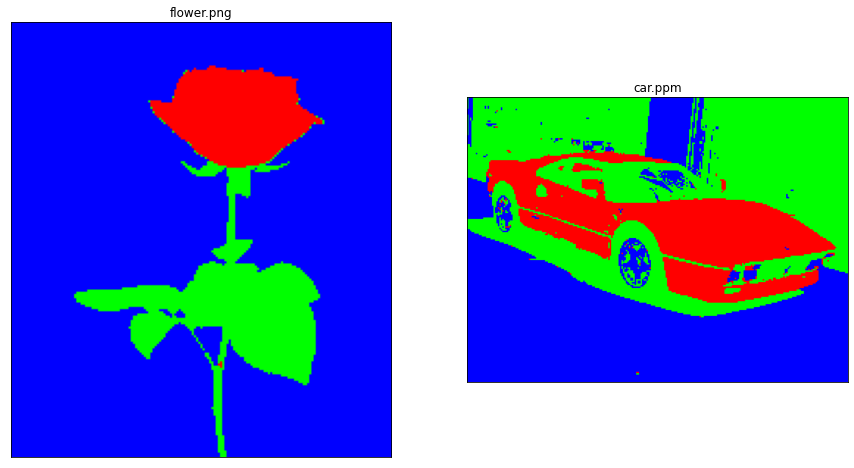

In [5]:
#plot the images
C,indLbl,ssq = kmeans(src1,K,C)
img1 = np.zeros(shape(src1))
img1[indLbl[0]] = [0,255,0]
img1[indLbl[1]] = [255,0,0]
img1[indLbl[2]] = [0,0,255]

C,indLbl,ssq = kmeans(src2,K,C)
img2 = np.zeros(shape(src2))
img2[indLbl[0]] = [0,255,0]
img2[indLbl[1]] = [255,0,0]
img2[indLbl[2]] = [0,0,255]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(img1.astype('uint8'),'gray')
ax1.set_title('flower.png')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(img2.astype('uint8'),'gray')
ax2.set_title('car.ppm')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()


C:\Users\ABDULW~1\AppData\Local\Temp/ipykernel_23456/1665323047.py:21: RuntimeWarning: Mean of empty slice.
  newC.append(clstr.mean(axis=0).astype(int))


MAX IMG1 [[170  48  10]
 [ 42 104  94]
 [166 159  55]]
MIN IMG1 [[155   2 147]
 [ 34 169 254]
 [ 13 226 110]]
MAX IMG2 [[170  48  10]
 [ 42 104  94]
 [166 159  55]]
MIN IMG2 [[ 18  57  92]
 [102  31 198]
 [ 94  70 109]]


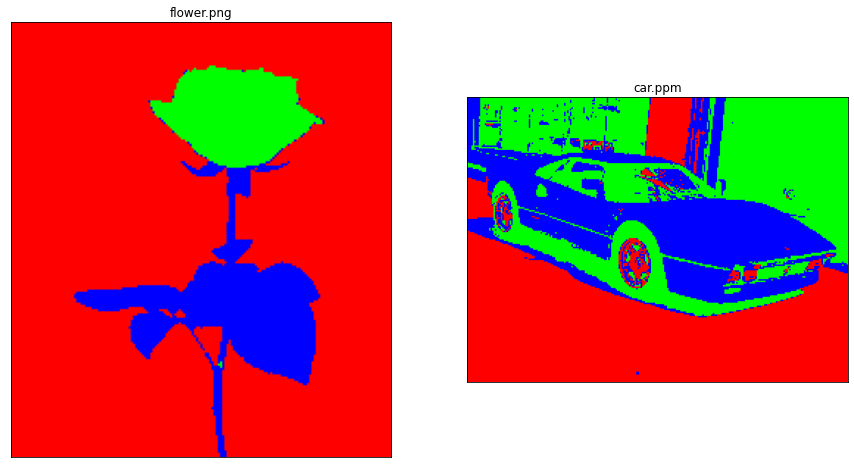

In [6]:
#Random initializations
#All centres and ssq
sqsum1 = []
sqsum2 = []
centres = []

for n in range(0,N) :
    #Generate random pixels
    c1 = sample(range(0,256),3)
    c2 = sample(range(0,256),3)
    c3 = sample(range(0,256),3)
    C = array([c1,c2,c3])
    centres.append(C)
    C,indLbl,ssq = kmeans(src1,K,C)
    sqsum1.append(ssq)
    C,indLbl,ssq = kmeans(src2,K,C)
    sqsum2.append(ssq)
    
print("MAX IMG1",centres[sqsum1.index(max(sqsum1))])
print("MIN IMG1",centres[sqsum1.index(min(sqsum1))])
print("MAX IMG2",centres[sqsum2.index(max(sqsum2))])
print("MIN IMG2",centres[sqsum2.index(min(sqsum2))])
    
#plot the images
C,indLbl,ssq = kmeans(src1,K,centres[sqsum1.index(min(sqsum1))])
img1 = np.zeros(shape(src1))
img1[indLbl[0]] = [0,255,0]
img1[indLbl[1]] = [255,0,0]
img1[indLbl[2]] = [0,0,255]

C,indLbl,ssq = kmeans(src2,K,centres[sqsum2.index(min(sqsum2))])
img2 = np.zeros(shape(src2))
img2[indLbl[0]] = [0,255,0]
img2[indLbl[1]] = [255,0,0]
img2[indLbl[2]] = [0,0,255]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(img1.astype('uint8'),'gray')
ax1.set_title('flower.png')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(img2.astype('uint8'),'gray')
ax2.set_title('car.ppm')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()


# Observations
The following observations can be made.
- Image Segmentation using k-means is extremely sensitive to the initial values chosen for the centroids
- Segmentation results using the given initial values for the centroids on an average look much better than those obtained by running k-means with random iterations multiple times and choosing the best clusters.
- Increasing the number of means to an extent can improve the look of the segmented image. However, it comes with the issue of grouping very similar pixels into different clusters.